### Regression Part II

**OBJECTIVES**

- Use `sklearn` to build multiple regression models
- Use `statsmodels` to build multiple regression models
- Evaluate models using `mean_squared_error`
- Interpret categorical coefficients

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

### Using Many Features

The big idea with a regression model is its ability to learn parameters of linear equations.  

$$y = \beta_0 + \beta_1x \quad and \quad y = \beta_0 + \beta_1x_1 + \beta_2x_2 + \beta_3x_3 + \dots$$

$$\begin{bmatrix} 1 & 3.2 & 4 \\
                        1 & 5.2 & 3 \\
                        1 & 4.1 & 3.4 
                        \end{bmatrix} \begin{bmatrix} \beta_0 \\
                        \beta_1 \\
                        \beta_2 \end{bmatrix} = \begin{bmatrix} 12 \\
                        10.4 \\
                        9.7 \end{bmatrix}$$
                        
$$X\beta =y$$

$$\beta = (X^TX)^{-1}X^Ty$$

In [2]:
tips = sns.load_dataset('tips')

In [3]:
X = tips['total_bill'].values.reshape(-1, 1)
y = tips['tip'].values.reshape(-1, 1)

In [4]:
intercept = np.ones(shape = X.shape)
design_matrix = np.concatenate((intercept, X), axis = 1)

In [5]:
design_matrix[:5]

array([[ 1.  , 16.99],
       [ 1.  , 10.34],
       [ 1.  , 21.01],
       [ 1.  , 23.68],
       [ 1.  , 24.59]])

In [6]:
np.linalg.inv(design_matrix.T@design_matrix)@design_matrix.T@y

array([[0.92026961],
       [0.10502452]])

### Advertising Data

The goal here is to predict sales. We have spending on three different media types to help make such predictions.  Here, we want to be selective about what features are used as inputs to the model.


In [7]:
ads = pd.read_csv('https://raw.githubusercontent.com/jfkoehler/nyu_bootcamp_fa24/main/data/ads.csv', index_col=0)

In [8]:
ads.head()

,TV,radio,newspaper,sales
1,230.1,37.8,69.2,22.1
2,44.5,39.3,45.1,10.4
3,17.2,45.9,69.3,9.3
4,151.5,41.3,58.5,18.5
5,180.8,10.8,58.4,12.9


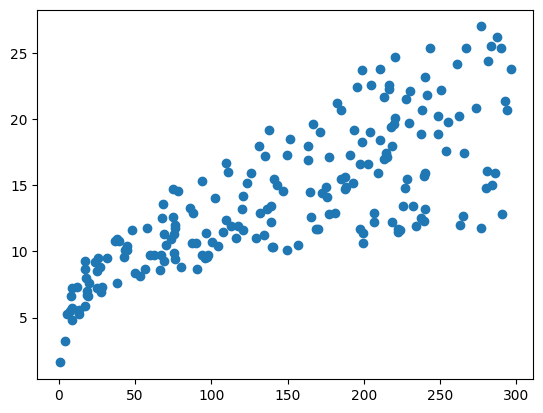

In [9]:
#scatterplot
plt.scatter(ads['TV'], ads['sales']);

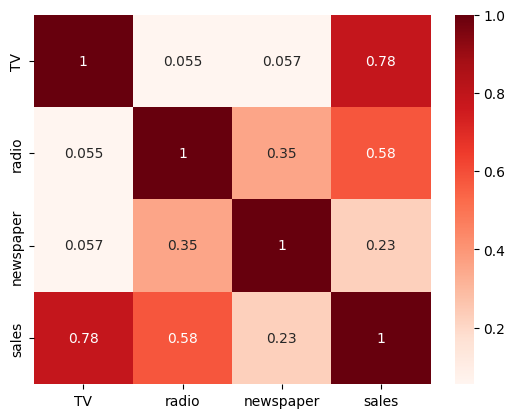

In [10]:
# heatmap
sns.heatmap(ads.corr(), annot = True, cmap = 'Reds');

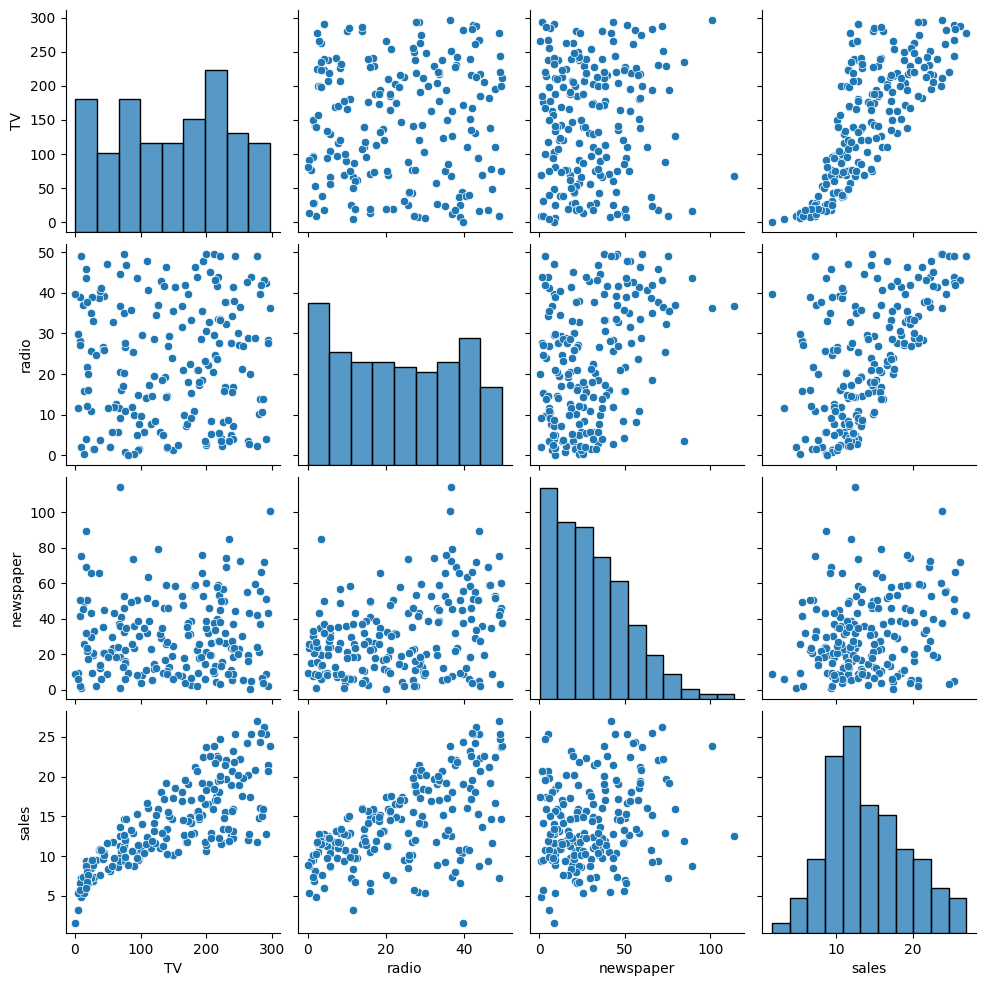

In [11]:
# pairplot
sns.pairplot(ads);

1. Choose a single column as `X` to predict sales.  Justify your choice -- remember to make `X` 2D.

In [12]:
#declare X and y
X = ''
y = ''

2. Build a regression model to predict `sales` using your `X` above.

In [13]:
# instantiate and fit the model
model1 = ''

3. Interpret the slope of the model.

In [14]:
# examine slope, what does it mean?


4. Interpret the intercept of the model.

In [15]:
#intercept


5. Look over the documentation for the `mean_squared_error` function and use it to evaluate the `mean_squared_error` of the model.

In [16]:
from sklearn.metrics import mean_squared_error

In [17]:
# MSE


6. Create baseline predictions using the mean of `y`. 

7. Compute the `mean_squared_error` of your baseline predictions.

In [18]:
# MSE Baseline


8. Did your model perform better than the baseline?  

#### the `.score` method

In addition to the `mean_squared_error` function, you are able to evaluate regression models using the objects `.score` method.  This method evaluates in terms of $r^2$.  One way to understand this metric is as the ratio between the *residual sum of squares* and the *total sum of squares*.  These are given by:

$$RSS =  \sum _{i}(y_{i}-f_{i})^{2}$$

$$TSS = \sum _{i}(y_{i}-{\bar {y}})^{2}$$

and 

$$r^2 = 1 - \frac{RSS}{TSS}$$

In [19]:
#model score


You can interpret this as the percent of variation in the data explained by the features according to your model.

#### Adding Features

Now, we want to include a second feature as input to the model.  Reexamine the plots and correlations above, what is a good second choice?

9. Choose two columns from the `ads` data, assign these as `X`. 

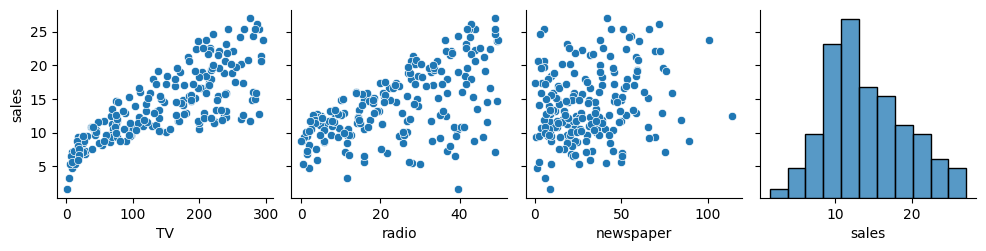

In [20]:
sns.pairplot(ads, y_vars = 'sales')

In [21]:
# X2
X2 = ads[['TV', 'radio']]

10. Build a regression model with two features to predict `sales`.

In [22]:
# lr2 model


11. Evaluate the model using `mean_squared_error`.

In [23]:
# yhat2

# MSE


12. Interpret the coefficients of the model

In [24]:
# make a dataframe here


#### Using `statsmodels`

A different library for models is the `statsmodels` library.  This contains more classic statistical modeling approaches including a statistical summary of the fit.  The interface is slightly different than that of `sklearn`.

13. Fit a regression model using `statsmodels`.

In [25]:
import statsmodels.api as sm

In [26]:
# instantiate and fit


14. Examine the summary of the model using `.summary()`.  

In [27]:
# model summary


15. Including an intercept term.

In [28]:
# add the constant 


In [29]:
# fit model


In [30]:
# summary


In [31]:
# LinearRegression()

### Example II: Credit Data

In [32]:
credit = pd.read_csv('https://raw.githubusercontent.com/jfkoehler/nyu_bootcamp_fa24/main/data/Credit.csv', index_col = 0)

In [33]:
credit.head(2)

,Income,Limit,Rating,Cards,Age,Education,Gender,Student,Married,Ethnicity,Balance
1,14.891,3606,283,2,34,11,Male,No,Yes,Caucasian,333
2,106.025,6645,483,3,82,15,Female,Yes,Yes,Asian,903


Build a regression model using `Ethnicity` feature to predict balance.  Interpret the coefficients.

In [34]:
#unique values?
credit['Ethnicity'].unique()

array(['Caucasian', 'Asian', 'African American'], dtype=object)

In [35]:
# using get_dummies


1. Define `X` and `y`.

2. Instantiate and fit.

3. Examine the coefficients.

4. Interpret the intercept.

5. Mean Squared Error

6. Baseline MSE

#### Problem

Only using Ethnicity to predict the balance is perhaps too simplistic of a model.  Select other features you believe to be important to predicting the Balance and build a regression model using these inputs.  Interpret your coefficients and discuss the overall performance of the model.

In [36]:
credit.head()

,Income,Limit,Rating,Cards,Age,Education,Gender,Student,Married,Ethnicity,Balance
1,14.891,3606,283,2,34,11,Male,No,Yes,Caucasian,333
2,106.025,6645,483,3,82,15,Female,Yes,Yes,Asian,903
3,104.593,7075,514,4,71,11,Male,No,No,Asian,580
4,148.924,9504,681,3,36,11,Female,No,No,Asian,964
5,55.882,4897,357,2,68,16,Male,No,Yes,Caucasian,331
